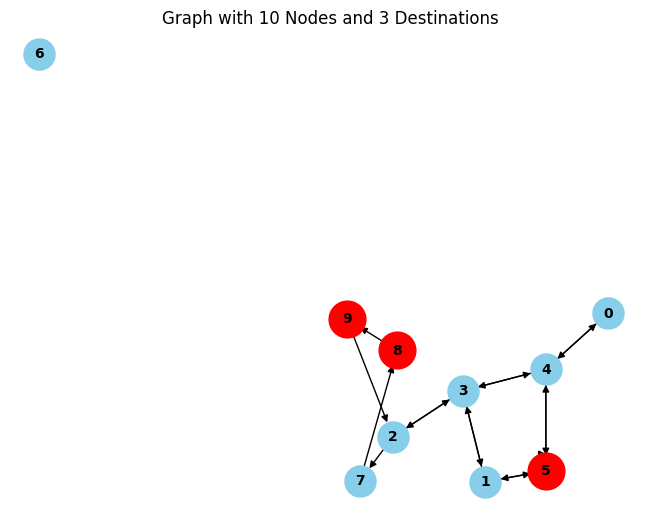




Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]]





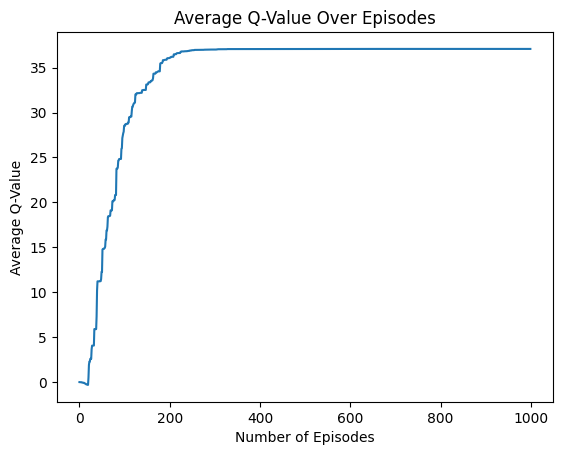





Final Q-matrix:
[[ 63.   79.   63.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.   -1.   62.2  80.   -1.   -1. ]
 [ 63.   80.   64.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 64.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.  100.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]]




Best path from node 6 to one of the destinations: [6, 4, 5]


In [ ]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 10
G.add_nodes_from(range(num_nodes))

# Add edges based on your description
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 5),
         (2, 7), (7, 8), (8, 9), (9, 2)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=10)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=700)
plt.title("Graph with 10 Nodes and 3 Destinations")
plt.show()
print('\n\n')
# Print the reward matrix
print("Reward Matrix:")
print(reward_matrix)
print('\n\n')

# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1000

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = []
average_q_values = []

# Q-learning algorithm
for episode in range(num_episodes):
    current_state = random.randint(0, num_states - 1)

    while current_state not in destination_nodes:
        action_taken = random.randint(0, num_actions - 1)
        next_state = action_taken

        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        current_state = next_state

    q_matrix_episodes.append(np.copy(Q_matrix))
    average_q_values.append(np.mean(Q_matrix))

# Plot the average Q-value over all states over episodes
plt.plot(range(num_episodes), average_q_values)
plt.xlabel("Number of Episodes")
plt.ylabel("Average Q-Value")
plt.title("Average Q-Value Over Episodes")
plt.show()
print('\n\n')

# Print the final Q-matrix after training
print("\nFinal Q-matrix:")
print(Q_matrix)
print('\n\n')

# Find the best path to one of the destination nodes
starting_node = 6  # Specify the starting node
current_state = starting_node
path = [current_state]

while current_state not in destination_nodes:
    action_taken = np.argmax(Q_matrix[current_state, :])
    next_state = action_taken
    path.append(next_state)
    current_state = next_state

# Print the best path
print("\nBest path from node {} to one of the destinations:".format(starting_node), path)


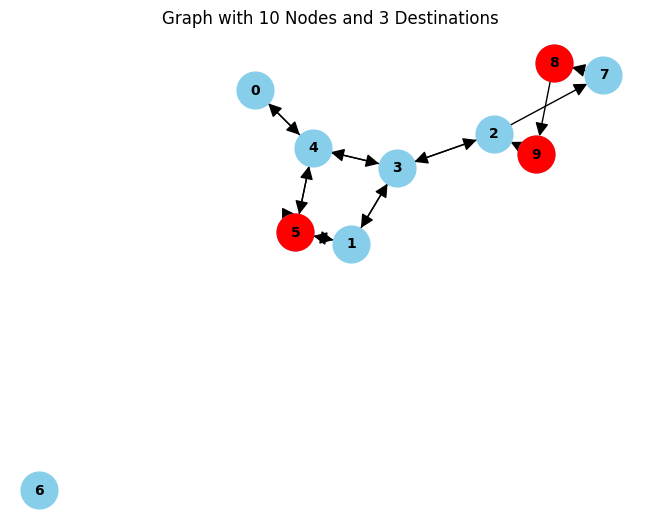

Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]]


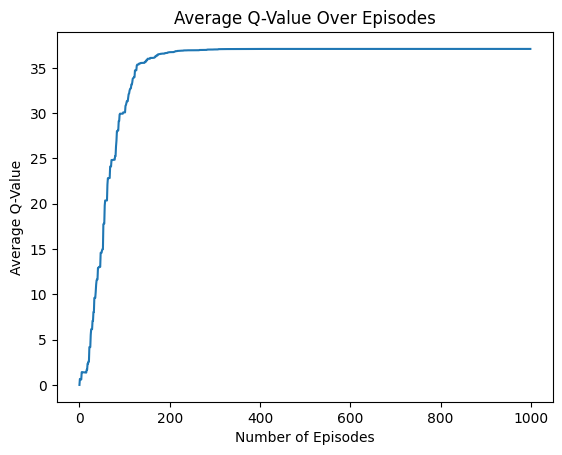


Final Q-matrix:
[[ 63.   79.   63.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.   -1.   62.2  80.   -1.   -1. ]
 [ 63.   80.   64.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 64.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.  100.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]]

Best path from node 1 to one of the destinations: [1, 5]


In [ ]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 10
G.add_nodes_from(range(num_nodes))

# Add edges based on your description
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 5),
         (2, 7), (7, 8), (8, 9), (9, 2)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=700)
plt.title("Graph with 10 Nodes and 3 Destinations")
plt.show()

# Print the reward matrix
print("Reward Matrix:")
print(reward_matrix)

# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1000

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = []
average_q_values = []

# Q-learning algorithm
for episode in range(num_episodes):
    current_state = random.randint(0, num_states - 1)

    while current_state not in destination_nodes:
        action_taken = random.randint(0, num_actions - 1)
        next_state = action_taken

        # Q-value update using the Bellman equation
        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        current_state = next_state

    q_matrix_episodes.append(np.copy(Q_matrix))
    average_q_values.append(np.mean(Q_matrix))

# Plot the average Q-value over all states over episodes
plt.plot(range(num_episodes), average_q_values)
plt.xlabel("Number of Episodes")
plt.ylabel("Average Q-Value")
plt.title("Average Q-Value Over Episodes")
plt.show()

# Print the final Q-matrix after training
print("\nFinal Q-matrix:")
print(Q_matrix)

# Find the best path to one of the destination nodes
starting_node = 1  # Specify the starting node
current_state = starting_node
path = [current_state]

while current_state not in destination_nodes:
    action_taken = np.argmax(Q_matrix[current_state, :])
    next_state = action_taken
    path.append(next_state)
    current_state = next_state

# Print the best path
print("\nBest path from node {} to one of the destinations:".format(starting_node), path)


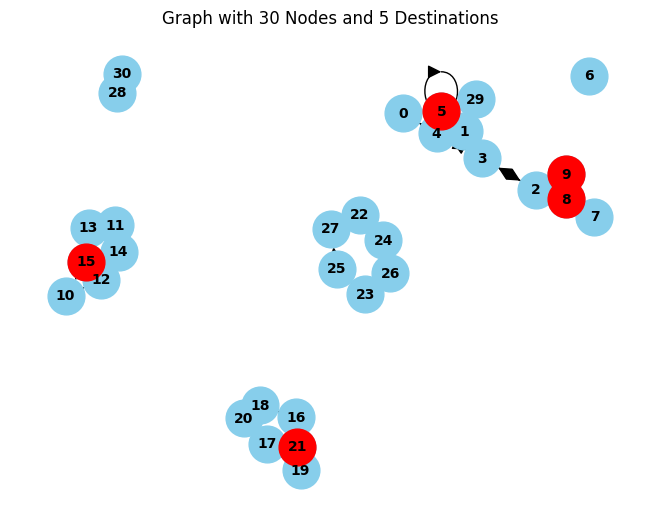

Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0. 100.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.  -1.  

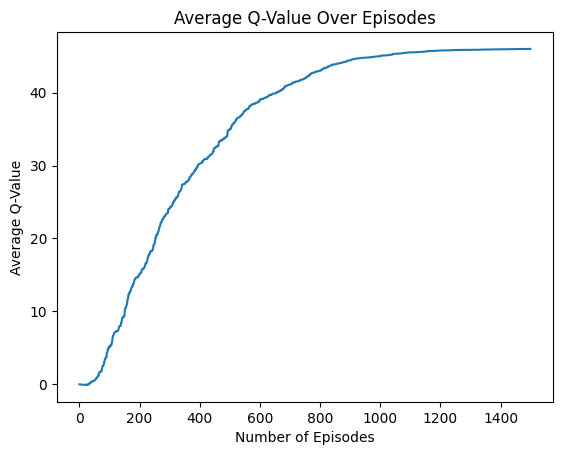


Final Q-matrix:
[[62.99223235 78.99760599 62.98009954 62.99177941 79.99796019 -0.99999744
  62.19885155 78.99888345 -0.99999744 -0.99999744 62.19989823 62.97342777
  62.18759233 78.99299226 62.19241385 -0.999936   62.15786682 62.68848851
  62.19987034 78.9686656  62.17292083 -1.         62.18867927 62.19817831
  62.19971805 62.18476743 62.19832452 62.19883848 62.19668885 62.97299268]
 [62.8900225  78.99788681 62.52911698 63.99864558 78.99916861 99.999744
  62.1768316  78.97350226 -0.999936   -0.99968    62.02171324 62.96879695
  62.19969562 78.99387609 62.16491027 -0.99999998 62.10084156 62.15365517
  62.19988222 78.8473896  62.18518901 -0.99999744 62.17582009 62.09730636
  62.19946017 62.19228954 62.19367374 62.19987307 62.19872629 62.99848521]
 [62.99235998 78.98407936 62.99900083 63.99891972 78.99879301 -0.99999998
  62.19614121 79.99998923 -0.99999998 -0.9984     62.05431306 61.96000728
  62.19910896 78.99074935 62.19853514 -0.96       62.19506244 62.65974891
  62.19943955 75.7553

In [ ]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 30
G.add_nodes_from(range(num_nodes))

# Add edges based on your description
# You may customize the edges based on your specific graph structure
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3),
         (4, 5), (5, 4), (5, 5), (2, 7), (7, 8), (8, 9), (9, 2), (10, 12), (11, 13),
         (12, 14), (13, 15), (14, 11), (15, 10), (16, 18), (17, 19), (18, 20),
         (19, 21), (20, 17), (21, 16), (22, 24), (23, 25), (24, 26), (25, 27),
         (26, 23), (27, 22), (28, 30), (29, 1), (30, 28)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8, 15, 21]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=700)
plt.title("Graph with 30 Nodes and 5 Destinations")
plt.show()

# Print the reward matrix
print("Reward Matrix:")
print(reward_matrix)

# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1500  # Adjust the number of episodes as needed

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = []
average_q_values = []

# Q-learning algorithm
for episode in range(num_episodes):
    current_state = random.randint(0, num_states - 1)

    while current_state not in destination_nodes:
        action_taken = random.randint(0, num_actions - 1)
        next_state = action_taken

        # Q-value update using the Bellman equation
        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        current_state = next_state

    q_matrix_episodes.append(np.copy(Q_matrix))
    average_q_values.append(np.mean(Q_matrix))

# Plot the average Q-value over all states over episodes
plt.plot(range(num_episodes), average_q_values)
plt.xlabel("Number of Episodes")
plt.ylabel("Average Q-Value")
plt.title("Average Q-Value Over Episodes")
plt.show()

# Print the final Q-matrix after training
print("\nFinal Q-matrix:")
print(Q_matrix)

# Find the best path to one of the destination nodes
starting_node = 1  # Specify the starting node
current_state = starting_node
path = [current_state]

while current_state not in destination_nodes:
    action_taken = np.argmax(Q_matrix[current_state, :])
    next_state = action_taken
    path.append(next_state)
    current_state = next_state

# Print the best path
print("\nBest path from node {} to one of the destinations:".format(starting_node), path)


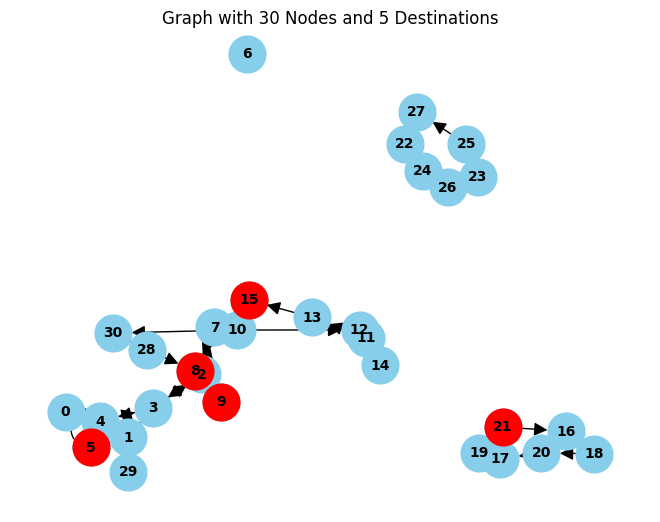

Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0. 100.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.  -1.  

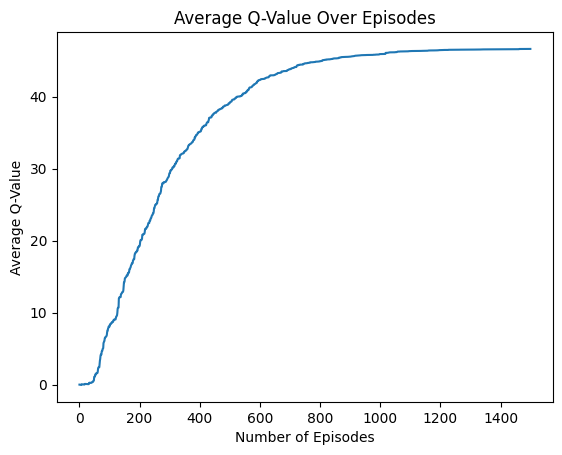

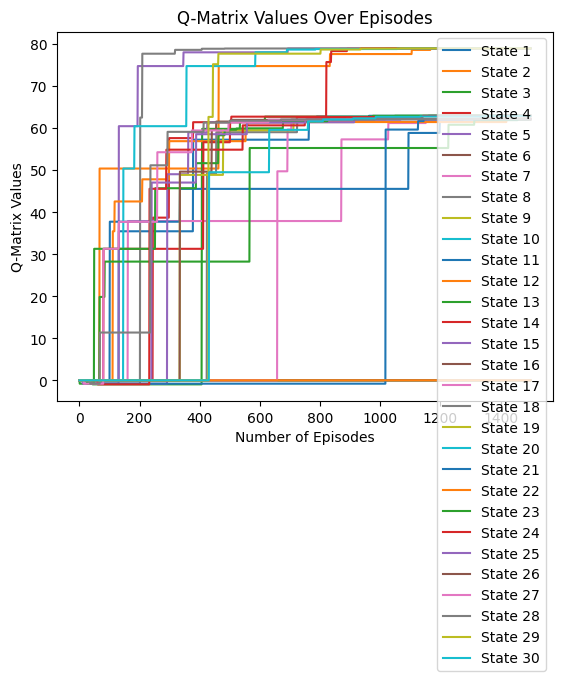


Final Q-matrix:
[[ 62.99985005  78.99678106  62.99978784  62.99894754  79.99999713
   -1.          62.19941079  78.80087265  -0.9999872   -1.
   62.19919131  61.55284585  62.1999775   78.99897228  62.19991669
   -0.99999949  62.19996208  62.99879438  62.1999929   78.99388763
   62.19874148  -0.9999872   62.19991825  62.19797287  62.19991387
   62.1821857   62.19998327  62.19901208  78.99895217  62.97940743]
 [ 62.99968121  78.9801472   62.99995906  63.99933009  78.99979696
   99.9999488   62.19988099  78.99999163  -1.          -0.9999999
   62.19996779  62.19990755  62.19983383  78.99962158  62.19892081
   -1.          62.199419    60.91843338  62.19941799  78.99812004
   62.19899452  -0.9999872   62.1998803   62.19988318  62.19996849
   62.19713771  62.195269    62.19900927  78.99922424  62.9874834 ]
 [ 62.99986723  78.98537984  62.99989871  63.99958815  78.99999631
   -1.          62.07421407  79.99999645  -1.          -0.99999744
   62.19062646  62.19812935  62.19717783  78.9989350

In [ ]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 30
G.add_nodes_from(range(num_nodes))

# Add edges based on your description
# You may customize the edges based on your specific graph structure
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3),
         (4, 5), (5, 4), (5, 5), (2, 7), (7, 8), (8, 9), (9, 2), (10, 12),(10, 30), (11, 13),
         (12, 14), (13, 15), (14, 11), (15, 10), (16, 18), (17, 19), (18, 20),
         (19, 21), (20, 17), (21, 16), (22, 24), (23, 25), (24, 26), (25, 27),
         (26, 23), (27, 22),(28, 8), (28, 30), (29, 1), (30, 28)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8, 15, 21]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=700)
plt.title("Graph with 30 Nodes and 5 Destinations")
plt.show()

# Print the reward matrix
print("Reward Matrix:")
print(reward_matrix)

# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1500  # Adjust the number of episodes as needed

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = []
average_q_values = []

# Q-learning algorithm
for episode in range(num_episodes):
    current_state = random.randint(0, num_states - 1)

    while current_state not in destination_nodes:
        action_taken = random.randint(0, num_actions - 1)
        next_state = action_taken

        # Q-value update using the Bellman equation
        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        current_state = next_state

    q_matrix_episodes.append(np.copy(Q_matrix))
    average_q_values.append(np.mean(Q_matrix))

# Plot the average Q-value over all states over episodes
plt.plot(range(num_episodes), average_q_values)
plt.xlabel("Number of Episodes")
plt.ylabel("Average Q-Value")
plt.title("Average Q-Value Over Episodes")
plt.show()

# Plot the Q-matrix values over episodes
plt.figure()
for i in range(num_states):
    plt.plot(range(num_episodes), [q_matrix[i, i] for q_matrix in q_matrix_episodes], label=f'State {i + 1}')

plt.xlabel("Number of Episodes")
plt.ylabel("Q-Matrix Values")
plt.title("Q-Matrix Values Over Episodes")
plt.legend()
plt.show()

# Print the final Q-matrix after training
print("\nFinal Q-matrix:")
print(Q_matrix)

# Find the best path to one of the destination nodes
starting_node = 1  # Specify the starting node
current_state = starting_node
path = [current_state]

while current_state not in destination_nodes:
    action_taken = np.argmax(Q_matrix[current_state, :])
    next_state = action_taken
    path.append(next_state)
    current_state = next_state

# Print the best path
print("\nBest path from node {} to one of the destinations:".format(starting_node), path)


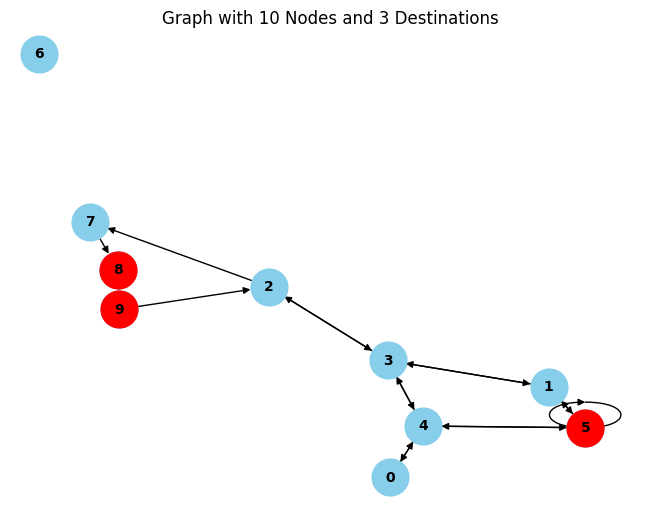

Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]]


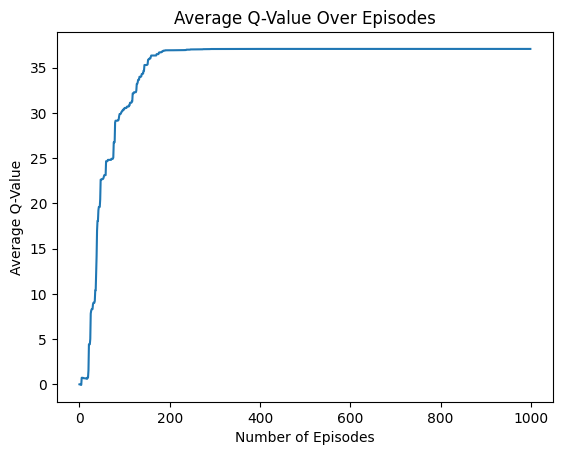


Final Q-matrix:
[[ 63.   79.   63.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.   -1.   62.2  80.   -1.   -1. ]
 [ 63.   80.   64.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 64.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.  100.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]]

Best path from node 1 to one of the destinations: [1, 5]


In [21]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 10
G.add_nodes_from(range(num_nodes))

# Add edges based on your description
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 5),
         (2, 7), (7, 8), (8, 9), (9, 2)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=10)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=700)
plt.title("Graph with 10 Nodes and 3 Destinations")
plt.show()

# Print the reward matrix
print("Reward Matrix:")
print(reward_matrix)

# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1000

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = []
average_q_values = []

# Q-learning algorithm
for episode in range(num_episodes):
    current_state = random.randint(0, num_states - 1)

    while current_state not in destination_nodes:
        action_taken = random.randint(0, num_actions - 1)
        next_state = action_taken

        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        current_state = next_state

    q_matrix_episodes.append(np.copy(Q_matrix))
    average_q_values.append(np.mean(Q_matrix))

# Plot the average Q-value over all states over episodes
plt.plot(range(num_episodes), average_q_values)
plt.xlabel("Number of Episodes")
plt.ylabel("Average Q-Value")
plt.title("Average Q-Value Over Episodes")
plt.show()

# Print the final Q-matrix after training
print("\nFinal Q-matrix:")
print(Q_matrix)

# Find the best path to one of the destination nodes
starting_node = 1  # Specify the starting node

#=========================================================
#------------------------DELETED--------------------------
#=========================================================
# current_state = starting_node
# path = [current_state]

# while current_state not in destination_nodes:
#     action_taken = np.argmax(Q_matrix[current_state, :])
#     next_state = action_taken
#     path.append(next_state)
#     current_state = next_state

# # Print the best path
# print("\nBest path from node {} to one of the destinations:".format(starting_node), path)
#=========================================================
#=========================================================


if starting_node in destination_nodes:
    print("\nStarting node is a destination. No path detected.")
elif starting_node not in [edge[0] for edge in edges] and starting_node not in [edge[1] for edge in edges]:
    print("\nStarting node is not part of any edge. No path detected.")
else:
    current_state = starting_node
    path = [current_state]

    while current_state not in destination_nodes:
        action_taken = np.argmax(Q_matrix[current_state, :])
        next_state = action_taken
        path.append(next_state)
        current_state = next_state

    # Print the best path
    print("\nBest path from node {} to one of the destinations:".format(starting_node), path)